In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import warnings
warnings.filterwarnings("ignore")


#### A. Preprocessing Steps:
1. Check for missing values / duplicates. 
2. Explore data structure and relationships. 
3. Encode variables and scale features.
4. Split data into training and test set

In [146]:
# read csv
data = pd.read_csv('Student_Performance.csv')

# number of students - 10000 students
len(data)

# check for any missing values
data.isna().sum()

# check for duplicate values -  127 students have same values across all columns
data[data.duplicated()]

# remove duplicate values
data_no_duplicates = data[~data.duplicated()]

# check for missing values

In [147]:
data_no_duplicates

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [148]:
# separate columns by dtype
num_cols = data_no_duplicates.select_dtypes(include=[np.number])
cat_cols = data_no_duplicates.select_dtypes(include=['object'])

# drop performance index from num_cols
num_cols = num_cols.drop(columns='Performance Index')


<Axes: >

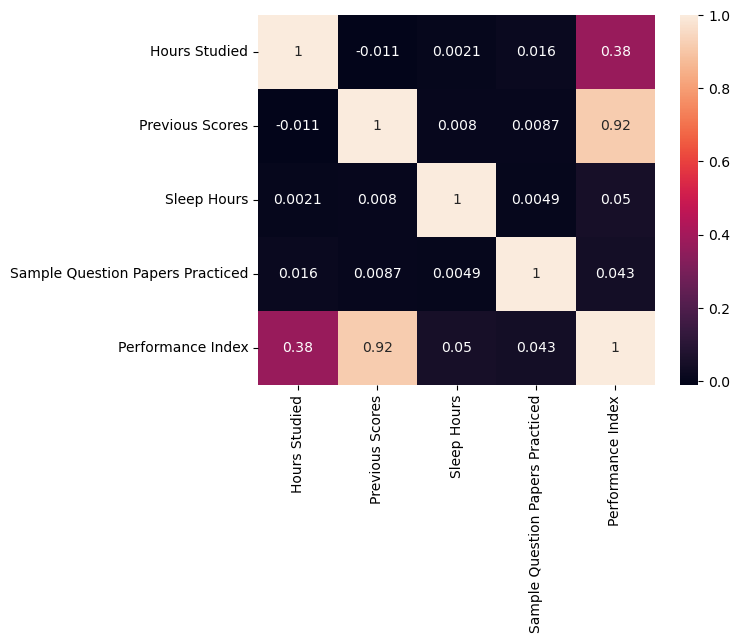

In [149]:
# correlation heatmap of features
sns.heatmap(data_no_duplicates.select_dtypes(exclude='object').corr(), annot=True)

In [150]:
# standardizing numerical features
for cols in num_cols:
    scaler = StandardScaler()
    data_no_duplicates[cols] = scaler.fit(data_no_duplicates[[cols]]).transform(data_no_duplicates[[cols]])


In [151]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)

# Fit encoder
ohe.fit(data_no_duplicates[['Extracurricular Activities']])

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The categories detected by the OneHotEncoder are [array(['No', 'Yes'], dtype=object)]


In [152]:
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "Street" column
data_no_duplicates[ohe.get_feature_names_out()] = ohe.transform(data_no_duplicates[['Extracurricular Activities']])

# Drop the column "Street" which has been encoded
data_no_duplicates.drop(columns = ["Extracurricular Activities"], inplace = True)

The column names for the encoded values are ['Extracurricular Activities_No' 'Extracurricular Activities_Yes']


In [153]:
data_no_duplicates = data_no_duplicates[['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced','Extracurricular Activities_No',
       'Extracurricular Activities_Yes', 'Performance Index']]

In [157]:
# split dataset into training and test dataset
X_new = data_no_duplicates[['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced',
       'Extracurricular Activities_No', 'Extracurricular Activities_Yes']]

y = data_no_duplicates['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)


In [158]:
# initialise linear regression model
reg = LinearRegression()

# fit regression model to training set
reg = reg.fit(X_train, y_train)

# predict y using X test set
y_pred = reg.predict(X_test)


0.9881474249575681

In [164]:
predicted_results = pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : np.round(y_pred)})
mae = mean_absolute_error(predicted_results['Actual Performance'], predicted_results['Predicted Performance'])
mse = mean_squared_error(predicted_results['Actual Performance'], predicted_results['Predicted Performance'])

In [ ]:
print(X_test)